In [1]:
import os

data_dir = "/home/user/Workspaces/python-machine-learning/cell_images"
os.listdir(data_dir)

['train', 'test']

# CNN: (1) Reading the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.image import imread

/home/user/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
test_path = data_dir + "/test/"
train_path = data_dir + "/train/"

In [4]:
os.listdir(test_path)


['parasitized', 'uninfected']

In [5]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path + 'parasitized')[0]

'C82P43ThinF_IMG_20150817_124728_cell_26.png'

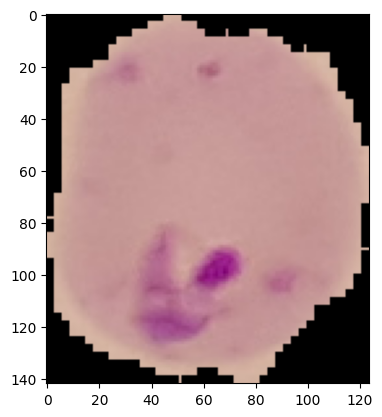

In [10]:
para_cell = train_path + "parasitized/" + "C82P43ThinF_IMG_20150817_124728_cell_26.png"
plt.imshow(imread(para_cell))

In [11]:
os.listdir(train_path + "uninfected")

['C149P110ThinF_IMG_20151115_114629_cell_75.png',
 'C173P134NThinF_IMG_20151130_115733_cell_194.png',
 'C188P149ThinF_IMG_20151203_134229_cell_44.png',
 'C2NThinF_IMG_20150604_114815_cell_95.png',
 'C237ThinF_IMG_20151127_104748_cell_152.png',
 'C85P46ThinF_IMG_20150820_105154_cell_200.png',
 'C48P9thinF_IMG_20150721_160944_cell_53.png',
 'C171P132ThinF_IMG_20151119_153851_cell_71.png',
 'C86P47ThinF_IMG_20150820_125057_cell_173.png',
 'C232ThinF_IMG_20151112_154211_cell_71.png',
 'C229ThinF_IMG_20151112_144222_cell_182.png',
 'C152P113ThinF_IMG_20151115_124853_cell_39.png',
 'C60P21thinF_IMG_20150803_144003_cell_81.png',
 'C64P25N_ThinF_IMG_20150818_153401_cell_70.png',
 'C214ThinF_IMG_20151106_115440_cell_187.png',
 'C149P110ThinF_IMG_20151115_114910_cell_7.png',
 'C150P111ThinF_IMG_20151115_115950_cell_47.png',
 'C222ThinF_IMG_20151115_151433_cell_104.png',
 'C189P150ThinF_IMG_20151203_141719_cell_11.png',
 'C238NThinF_IMG_20151207_114914_cell_190.png',
 'C45P6ThinF_IMG_20151130_154

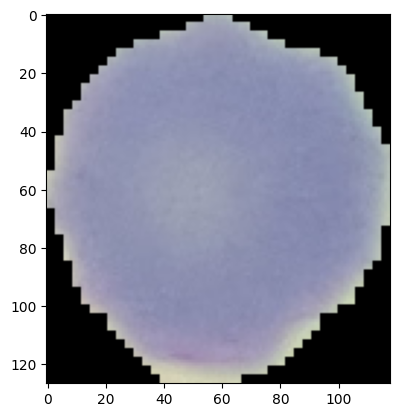

In [36]:
uninfected_cell = train_path + "uninfected/" + "C149P110ThinF_IMG_20151115_114629_cell_75.png"
plt.imshow(imread(uninfected_cell))


In [19]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + "uninfected"):
    img = imread(test_path + "uninfected/" + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

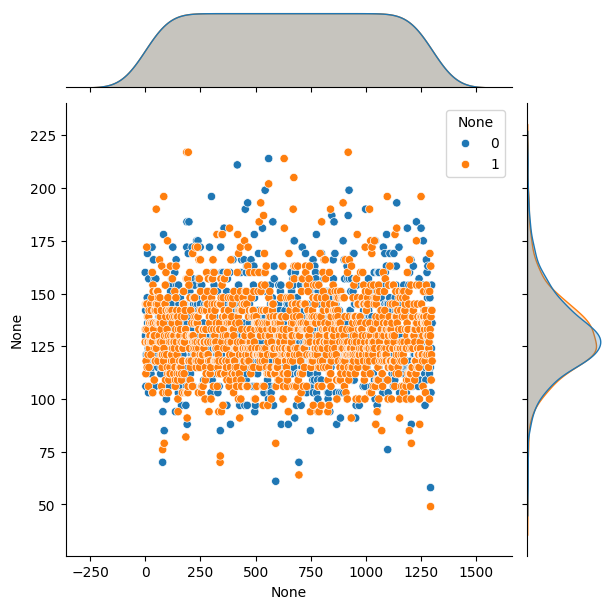

In [24]:
sns.jointplot([dim1, dim2])

In [29]:
np.mean(dim1)


130.92538461538462

In [30]:
np.mean(dim2)

130.75

# CNN: (2) Data Processing

In [32]:
image_shape = (130,130,3)

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=

In [34]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                               zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

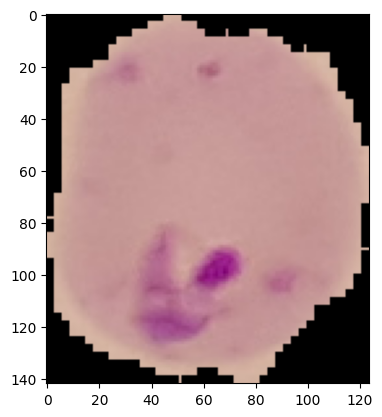

In [39]:
plt.imshow(imread(uninfected_cell))
plt.imshow(imread(para_cell))
para_img = imread(para_cell)

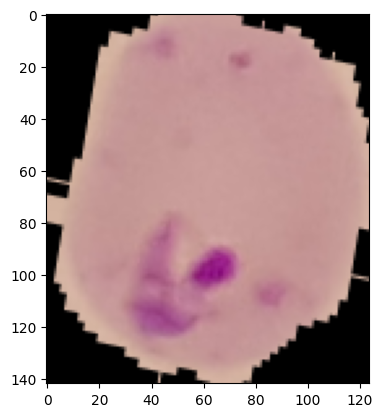

In [61]:
plt.imshow(image_gen.random_transform(para_img))

In [62]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


# CNNs: (3) Creating the Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [65]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/home/user/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,465 (3.14 MB)

 Trainable params: 822,465 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience =  2)

batch_size=16

In [70]:
train_image_gen = image_gen.flow_from_directory(
    train_path, target_size=image_shape[:2], color_mode="rgb", batch_size=batch_size,
    class_mode= 'binary'
)

Found 24958 images belonging to 2 classes.


In [71]:
test_image_gen = image_gen.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

Found 2600 images belonging to 2 classes.


In [74]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [76]:
results=model.fit(train_image_gen, epochs=20, validation_data = test_image_gen,
                            callbacks = [early_stop])

Epoch 1/20


/home/user/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1560/1560 ━━━━━━━━━━━━━━━━━━━━ 398s 254ms/step - accuracy: 0.7334 - loss: 1.1786 - val_accuracy: 0.9165 - val_loss: 0.2484
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 398s 255ms/step - accuracy: 0.9191 - loss: 0.2580 - val_accuracy: 0.9258 - val_loss: 0.2284
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 295s 189ms/step - accuracy: 0.9306 - loss: 0.2172 - val_accuracy: 0.9400 - val_loss: 0.1938
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 285s 182ms/step - accuracy: 0.9407 - loss: 0.1912 - val_accuracy: 0.9419 - val_loss: 0.1804
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 312s 200ms/step - accuracy: 0.9445 - loss: 0.1843 - val_accuracy: 0.9381 - val_loss: 0.1832
Epoch 6/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 275s 176ms/step - accuracy: 0.9439 - loss: 0.1802 - val_accuracy: 0.9450 - val_loss: 0.1813


In [77]:
model.history.history

{'accuracy': [0.8426556587219238,
  0.919745147228241,
  0.934770405292511,
  0.9402195811271667,
  0.9447471499443054,
  0.9460293054580688],
 'loss': [0.47976264357566833,
  0.2471495270729065,
  0.2095775455236435,
  0.19094611704349518,
  0.18087032437324524,
  0.1742890328168869],
 'val_accuracy': [0.9165384769439697,
  0.9257692098617554,
  0.9399999976158142,
  0.9419230818748474,
  0.938076913356781,
  0.9449999928474426],
 'val_loss': [0.2483942061662674,
  0.2284063696861267,
  0.1938125342130661,
  0.18038518726825714,
  0.18324460089206696,
  0.18129053711891174]}